In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("2025-11-28_18-06-40-341.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
df.head()

,CH1,CH2,time,Ts
0,-0.180000,-0.600313,0.000000e+00,2.000000e-09
1,-0.179844,-0.440937,2.000000e-09,NaN
2,-0.140000,-0.478125,4.000000e-09,NaN
3,-0.180000,-0.442188,6.000000e-09,NaN
4,-0.179844,-0.359375,8.000000e-09,NaN


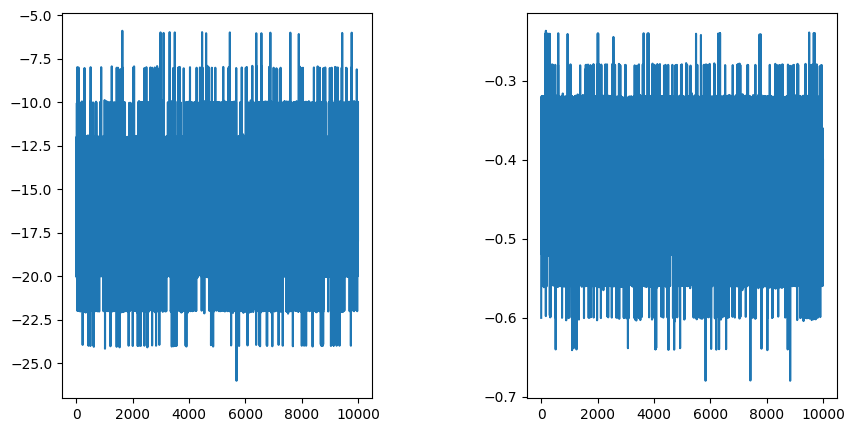

In [9]:

fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
axs[0].plot(vds)
axs[1].plot(iD)


In [10]:
vds_thre= vds.mean()
iD_thre= iD.mean()

In [11]:
df = pd.read_csv("2025-11-28_18-19-47-406.csv")
df.head()

,CH1,CH2,time,Ts
0,3.519531,-0.404062,0.000000e+00,2.000000e-09
1,3.540000,-0.360000,2.000000e-09,NaN
2,3.540000,-0.520312,4.000000e-09,NaN
3,3.539687,-0.399687,6.000000e-09,NaN
4,3.499375,-0.400000,8.000000e-09,NaN


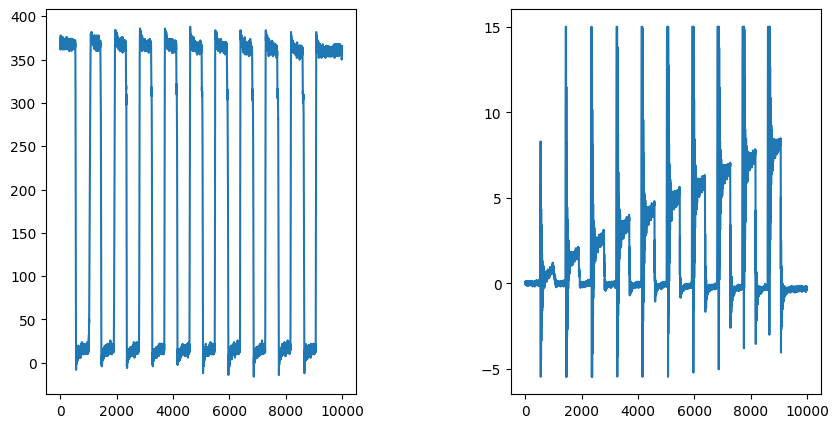

In [12]:
Ts = df.Ts.values[0]
vds = df.CH1.values*100 -vds_thre # x100 probe
iD =  df.CH2.values-iD_thre # x100 probe
iD = iD -iD[:500].mean()
#diD =  df.CH2.values # x100 probe
#diD = diD -diD[:500].mean()

#vgs = df.CH4.values
#vgs = vgs-vgs[:500].mean()


fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
axs[0].plot(vds)
axs[1].plot(iD)

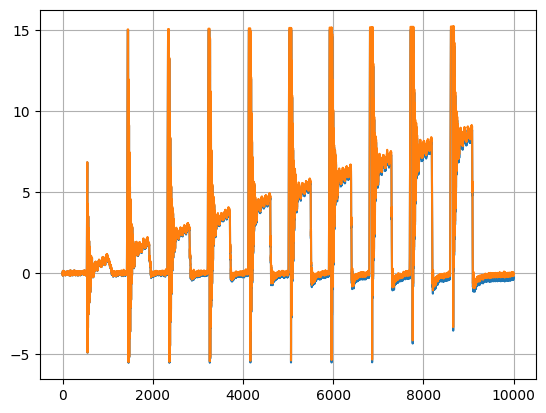

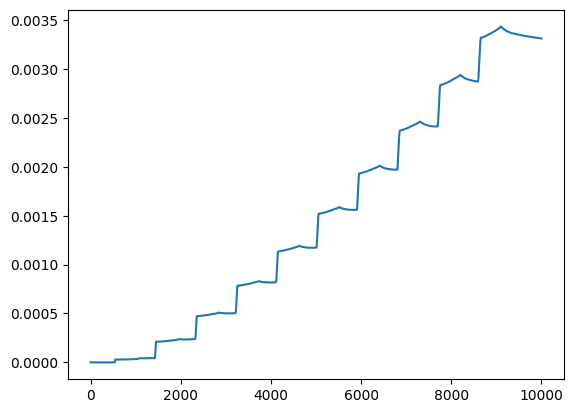

In [40]:
plt.plot(iD)
k= 2.5e-5
iD2= iD + np.arange(0,len(iD))*k
plt.plot(iD2)
plt.grid()
plt.show()
# Primary y-axis
p = vds*iD2
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
#plt.plot(t, p, color='C2')
#plt.show()
plt.plot( E)


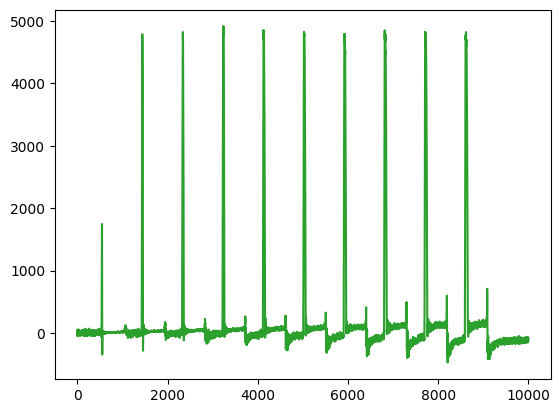

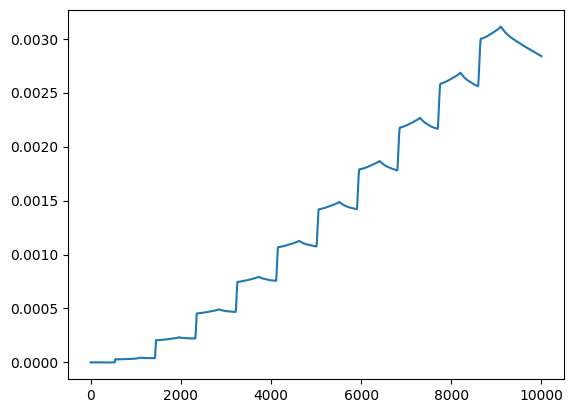

In [44]:
#### Primary y-axis
p = vds*iD
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
plt.plot( p, color='C2')
plt.show()
plt.plot( E)




21


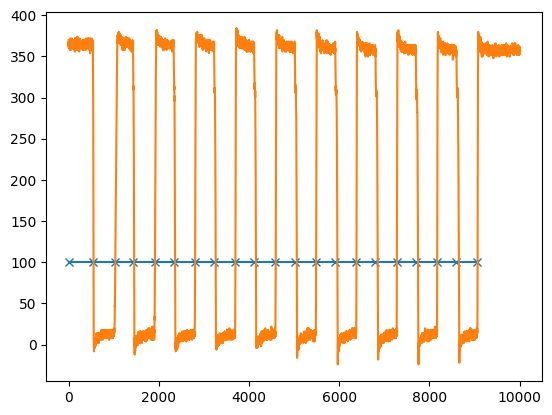

In [82]:
from math import *
arg=[0]
for i in range(10, len(vds)-10):
    if abs(vds[i+3]-vds[i-3])>20:
        if i-arg[-1]>100:
            arg.append(i) 
print(len(arg))
plt.plot(arg, len(arg)*[100], marker="x")
plt.plot(vds)

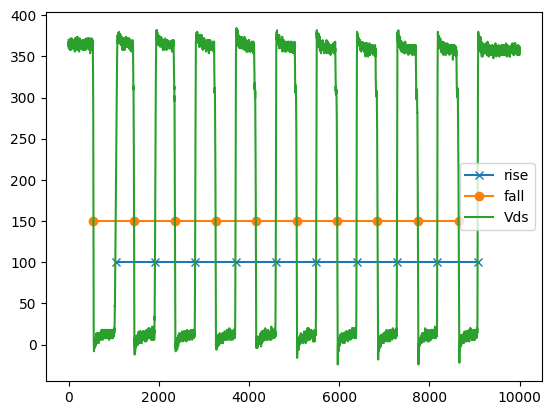

In [92]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
plt.plot(idx_rise, len(idx_rise)*[100], marker="x", label = "rise")
plt.plot(idx_fall, len(idx_fall)*[150], marker="o", label = "fall")
plt.plot(vds, label = "Vds")
plt.legend()

C:\Users\a037702\AppData\Local\Temp\ipykernel_20040\2473410908.py:18: RuntimeWarning: Mean of empty slice.
  I1 = iD[i-di*2-10:i-10].mean()


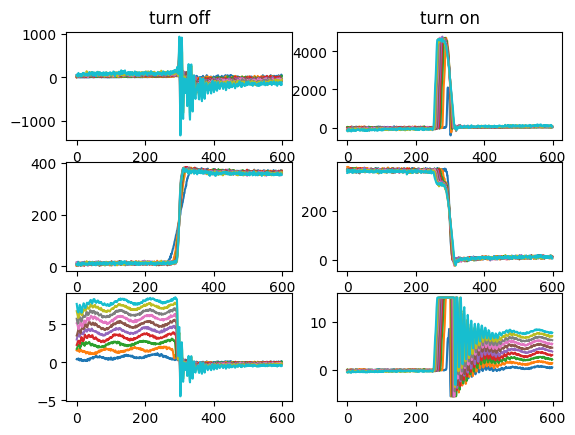

In [97]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")

fig , axs= plt.subplots(3,2)
di=300
Eon={}
Eoff={}
for i in idx_rise: 
    I1 = iD[i+10:i+di*2+10].mean()
    p=vds[i-di:i+di]*iD[i-di:i+di]
    E= np.sum(p)*Ts*1e6
    Eoff[I1]=E
    axs[0][0].plot(p)
    axs[1][0].plot(vds[i-di:i+di])
    axs[0][0].set_title("turn off")
    axs[2][0].plot(iD[i-di:i+di])
for i in idx_fall: 
    I1 = iD[i-di*2-10:i-10].mean()
    p=vds[i-di:i+di]*iD[i-di:i+di]
    E= np.sum(p)*Ts*1e6
    axs[0][1].plot(p)
    axs[1][1].plot(vds[i-di:i+di])
    axs[0][1].set_title("turn on")
    axs[2][1].plot(iD[i-di:i+di])
    Eon[I1]=E
    

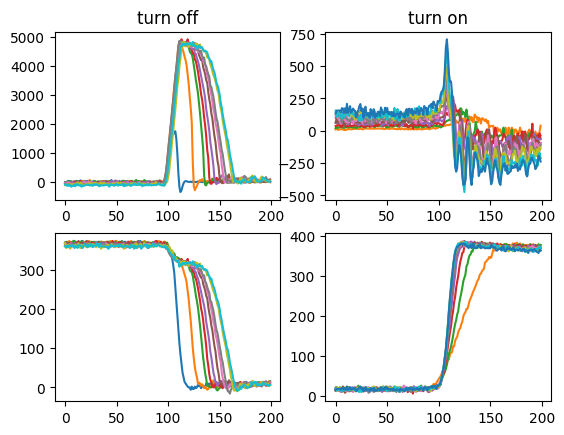

In [46]:
fig , axs= plt.subplots(2,2)
di=100
Eon={}
Eoff={}
for i in arg:
    I1 = iD[i+10:i+di*2+10].mean()
    I2 = iD[i-di*2-10:i-10].mean()
    if I2> I1:
        I1= I2
    
        
    p=vds[i-di:i+di]*iD[i-di:i+di]


    E= np.sum(p)*Ts*1e6
    if vds[i-di] > vds[i+di]: # turn off
        axs[0][0].plot(p)
        axs[1][0].plot(vds[i-di:i+di])
        axs[0][0].set_title("turn off")
        Eoff[I1]=E
    else : # turn on
        axs[0][1].plot(p)
        axs[1][1].plot(vds[i-di:i+di])
        axs[0][1].set_title("turn on")
        Eon[I1]=E

    
    
    

C:\Users\a037702\AppData\Local\Temp\ipykernel_20040\262040424.py:7: RuntimeWarning: Mean of empty slice.
  I2 = iD[i-di*2-10:i-10].mean()


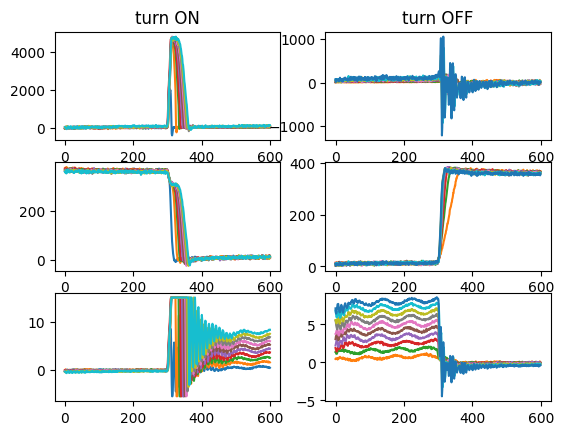

In [75]:
fig , axs= plt.subplots(3,2)
di=300
Eon={}
Eoff={}
for i in arg:
    I1 = iD[i+10:i+di*2+10].mean()
    I2 = iD[i-di*2-10:i-10].mean()
    #print(I1, I2)
    if I2> I1:
        I1= I2
    
    

    if vds[i-di] > vds[i+di]: # turn off
        
        I0 = iD[i-di:i-di+50].mean()
        p=vds[i-di:i+di]*(iD[i-di:i+di]-I0)
        E= np.sum(p)*Ts*1e6
        
        axs[0][0].set_title("turn ON")
        axs[0][0].plot(p)
        axs[1][0].plot(vds[i-di:i+di])
        axs[2][0].plot(iD[i-di:i+di])


        
        Eon[I1]=E
    else : # turn on
        I0 = iD[i+di-50:i+di].mean()
        p=vds[i-di:i+di]*(iD[i-di:i+di]-I0)
        E= np.sum(p)*Ts*1e6
        axs[0][1].set_title("turn OFF")
        axs[0][1].plot(p)
        axs[1][1].plot(vds[i-di:i+di])
        axs[2][1].plot(iD[i-di:i+di])
        Eoff[I1]=E

    #print(I0) 
    
    
    
    

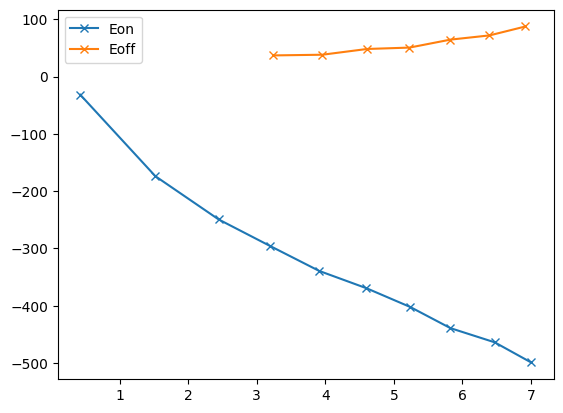

In [48]:
(-pd.Series(Eon)).plot(label = "Eon",marker="x")
s=pd.Series(Eoff)
s=s[s.index>3]
s.plot(label = "Eoff",marker="x")
plt.legend()

# End

In [68]:
l = """10 ohm 
2025-11-28_18-16-13-175
5 ohm 
2025-11-28_18-17-36-908
3 ohm 
2025-11-28_18-18-15-605
10//5 ohm 
2025-11-28_18-19-08-573
10//3 ohm 
2025-11-28_18-19-47-406
5//3 ohm 
2025-11-28_18-44-01-262""".replace(" ", "").split("\n")
names = l[1::2]
labels=l[0::2]
print(names), print(labels)

['2025-11-28_18-16-13-175', '2025-11-28_18-17-36-908', '2025-11-28_18-18-15-605', '2025-11-28_18-19-08-573', '2025-11-28_18-19-47-406', '2025-11-28_18-44-01-262']
['10ohm', '5ohm', '3ohm', '10//5ohm', '10//3ohm', '5//3ohm']


(None, None)

In [79]:
#list={}
dic  = {}
for i in range(len(names)):
    data ={}
    path  = names[i]+".csv"
    label = labels[i]
    print(path, label)
    df = pd.read_csv(path)
    Ts = df.Ts.values[0]
    vds = df.CH1.values*100 -vds_thre # x100 probe
    iD =  df.CH2.values-iD_thre # x100 probe
    iD = iD -iD[:500].mean()
    
    
    iD2= iD + np.arange(0,len(iD))*k
    
    p = vds*iD2
    p = p-p[:500].mean()
    E =np.cumsum(p)*Ts
    
    p = vds*iD
    p = p-p[:500].mean()
    E =np.cumsum(p)*Ts
    p = vds*iD2
    p = p-p[:500].mean()
    E =np.cumsum(p)*Ts
    
    
    from math import *
    arg=[0]
    for i in range(10, len(vds)-10):
        if abs(vds[i+3]-vds[i-3])>20:
            if i-arg[-1]>100:
                arg.append(i) 
    print(len(arg))
    #plt.plot(arg, len(arg)*[100], marker="x")
    #plt.plot(vds)
    #plt.show()
    
    #fig , axs= plt.subplots(3,2)
    di=100
    Eon={}
    Eoff={}






    di=300
    Eon={}
    Eoff={}
    for i in arg:
        I1 = iD[i+10:i+di*2+10].mean()
        I2 = iD[i-di*2-10:i-10].mean()
        #print(I1, I2)
        if I2> I1:
            I1= I2
        
        
        if len(iD[i-di*2-10:i-10]) ==0: 
            print("empty", label)
        if vds[i-di] > vds[i+di]: # turn on
            
            I0 = iD[i-di:i-di+50].mean()
            p=vds[i-di:i+di]*(iD[i-di:i+di]-I0)
            E= np.sum(p)*Ts*1e6
            Eon[I1]=E
        else : # turn off
            I0 = iD[i+di-50:i+di].mean()
            p=vds[i-di:i+di]*(iD[i-di:i+di]-I0)
            E= np.sum(p)*Ts*1e6
            Eoff[I1]=E
    
        #print(I0) 
    
    
    
    
        
            

        
        
        
    #plt.show()  
    data["Eon"]=Eon
    #(-pd.Series(Eon)).plot(label = "Eon",marker="x")
    #s.plot(label = "Eoff",marker="x")
    data["Eoff"]= Eoff
    #plt.legend()
    #plt.show()
    dic[label]= data

2025-11-28_18-16-13-175.csv 10ohm
21
empty 10ohm
2025-11-28_18-17-36-908.csv 5ohm
21
empty 5ohm
2025-11-28_18-18-15-605.csv 3ohm
21
empty 3ohm
2025-11-28_18-19-08-573.csv 10//5ohm
21
empty 10//5ohm
2025-11-28_18-19-47-406.csv 10//3ohm
21
empty 10//3ohm
2025-11-28_18-44-01-262.csv 5//3ohm
21
empty 5//3ohm


C:\Users\a037702\AppData\Local\Temp\ipykernel_20040\1492406441.py:55: RuntimeWarning: Mean of empty slice.
  I2 = iD[i-di*2-10:i-10].mean()
C:\Users\a037702\NotSynchronized\VirtualEnvs\venv1\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\a037702\AppData\Local\Temp\ipykernel_20040\1492406441.py:55: RuntimeWarning: Mean of empty slice.
  I2 = iD[i-di*2-10:i-10].mean()
C:\Users\a037702\NotSynchronized\VirtualEnvs\venv1\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\a037702\AppData\Local\Temp\ipykernel_20040\1492406441.py:55: RuntimeWarning: Mean of empty slice.
  I2 = iD[i-di*2-10:i-10].mean()
C:\Users\a037702\NotSynchronized\VirtualEnvs\venv1\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount

In [73]:
dic

{'10ohm': {'Eon': {},
  'Eoff': {np.float64(8.338953125): np.float64(50.157762635234384)}},
 '5ohm': {'Eon': {},
  'Eoff': {np.float64(8.082224375000001): np.float64(38.32523164426661)}},
 '3ohm': {'Eon': {},
  'Eoff': {np.float64(8.0254059375): np.float64(33.255352884074206)}},
 '10//5ohm': {'Eon': {},
  'Eoff': {np.float64(8.026780625): np.float64(36.123589971819335)}},
 '10//3ohm': {'Eon': {},
  'Eoff': {np.float64(7.9915840624999985): np.float64(33.72948812031251)}},
 '5//3ohm': {'Eon': {},
  'Eoff': {np.float64(8.003614375): np.float64(26.810085656764656)}}}

In [70]:
dic.keys()

dict_keys(['10ohm', '5ohm', '3ohm', '10//5ohm', '10//3ohm', '5//3ohm'])

In [71]:
dic['10ohm'].keys()

dict_keys(['Eon', 'Eoff'])

In [72]:
dic['10ohm']

{'Eon': {}, 'Eoff': {np.float64(8.338953125): np.float64(50.157762635234384)}}

TypeError: no numeric data to plot

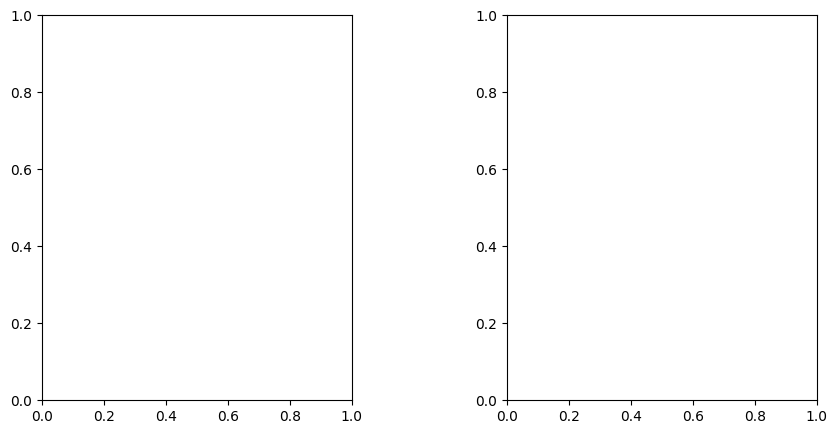

In [56]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():
    Eon = v["Eon"]
    Eon = Eon[Eon.index>1]

    (-Eon).plot(ax = axs[0], label = kk)
    (-v["Eoff"]).plot(ax = axs[1], label = kk)
axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()